# Problema 1

Felipe Mata

Diego Chinchilla

Grupo 23

Importamos librerías que se van a utilizar en el transcurso del notebook

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

from scipy.special import factorial as fact
from scipy.special import sph_harm_y as sph_harm
import scipy as sp



Valores importantes

In [2]:
a0 = 1 # Radio de Bohr
#números cuánticos:
k = 4
l = 0
m = 0

Constantes a utilizar para la gráfica

In [3]:
#iteraciones para crear la gráfica
N = 1000
n = 50
#angulos
theta0 = np.pi/2
phi0 = 0
phi1 = np.pi

Ponemos todas las funciones creadas para poder ver los orbitales

In [4]:
def lamda(k,l):
    return 1/(k+l)

def c(k,l,q):
    return (-1)**q * (2/(k+l))**q * (fact(k-1)/fact(k-q-1)) * (fact(2*l+1)/(fact(q)*fact(q+2*l+1)))

def y(k, l, rho):
    sum = 1

    for q in range(k):
        sum = sum + c(k,l,q) * rho**q

    return rho**(l+1)*sum

 #para calcular la función de onda
def u(k,l,rho):
    return np.exp(-rho*lamda(k,l)) * y(k,l,rho)

def c0(k,l):
    def integrand(r,k,l):
        return  np.conjugate(u(k,l,r/a0)) * u(k,l,r/a0)

    return np.sqrt(1 / (sp.integrate.quad(integrand ,0 ,np.inf, args=(k,l))[0]))

def u_norm(k,l,rho):
    return c0(k,l) * u(k,l,rho)


def R(k,l,r):
    return (1/r) * u_norm(k,l,r/a0)
#función de onda
def psi(k, l, m, r, theta, phi):
    return R(k,l,r) * sph_harm(l, m, theta, phi)
#Probabilidad
def P(k, l, m, r, theta, phi):
    return np.conjugate(psi(k, l, m, r, theta, phi)) * psi(k, l, m, r, theta, phi)

In [5]:
r_disc, theta_disc = np.meshgrid(np.linspace(0.1,85,N),np.linspace(0,2*np.pi,N)) # El radio llega hasta 85 radios de bohr para que calce con la escala de la imagen original
z_axe = r_disc * np.cos(theta_disc)
x_axe = r_disc * np.sin(theta_disc) * np.cos(phi0)

Ahora hacemos una función que genere el gráfico de forma que tenga una barra de color para así ver la distribución

In [6]:
def Gen_Save_Graph(k,l,m, limInf):

    Density = P(k, l, m, r_disc, theta_disc, phi0)
##Creador de la gráfica
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(1, 1, 1)
#parámetros de la barra
    COLOR = 'white'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR

    plt.pcolormesh(x_axe, z_axe, np.real(Density), norm=colors.LogNorm(vmin=limInf, vmax=np.real(Density.max())), cmap="jet")#, shading="gouraud"

    plt.xlim([x_axe.min()-0.5,x_axe.max()+0.5])
    plt.ylim([z_axe.min()-0.5,z_axe.max()+0.5])

    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    ax.set_title(f"{k},{l},{m}")
    #barra
    plt.colorbar()

    plt.show

Debido a las escalas tan diferentes que tiene la densidad de probabilidad de cada combinación de ``klm``, se debe definir manualmente un límite inferior para cada orbital, para tener una escala.

In [7]:
limInf = {"1,0,0":1e-5, "2,0,0":1e-5, "2,1,0":1e-5, "2,1,1":1e-5, "3,0,0":1e-6,
          "3,1,0":1e-6, "3,1,1":1e-6, "3,2,0":1e-6, "3,2,1":1e-6, "3,2,2":1e-6,
          "4,0,0":1e-8, "4,1,0":1e-8, "4,1,1":1e-8, "4,2,0":5e-9, "4,2,1":1e-9,
          "4,2,2":5e-9, "4,3,0":1e-8, "4,3,1":1e-8, "4,3,2":1e-8, "4,3,3":1e-8}

Ahora llamo a la probabilidad y gráfico

C:\Users\Felipe Mora Mora\AppData\Local\Temp\ipykernel_11204\317987438.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x_axe, z_axe, np.real(Density), norm=colors.LogNorm(vmin=limInf, vmax=np.real(Density.max())), cmap="jet")#, shading="gouraud"


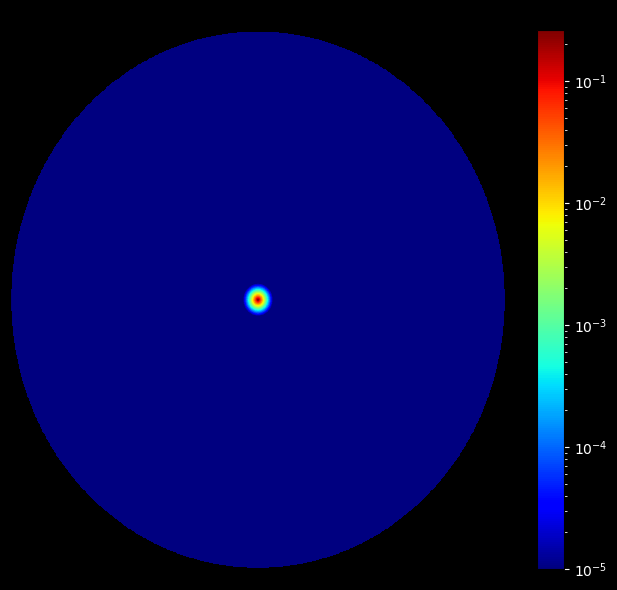

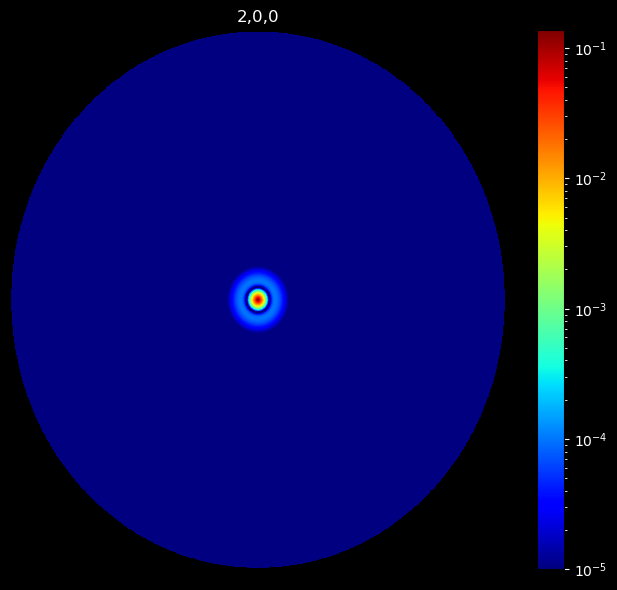

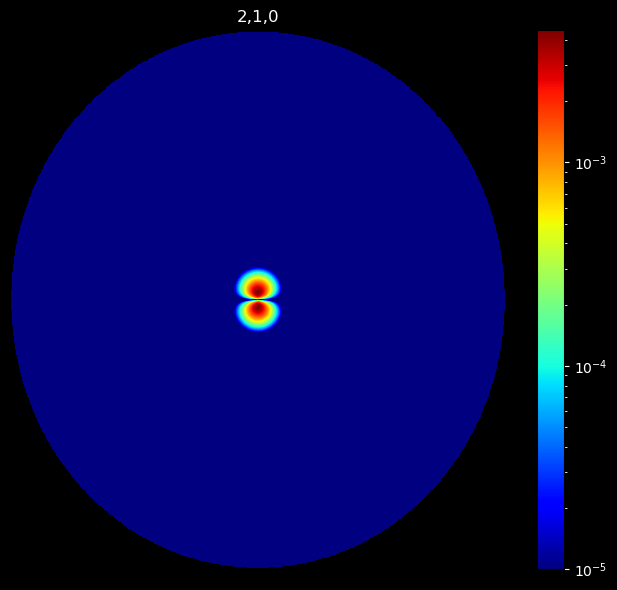

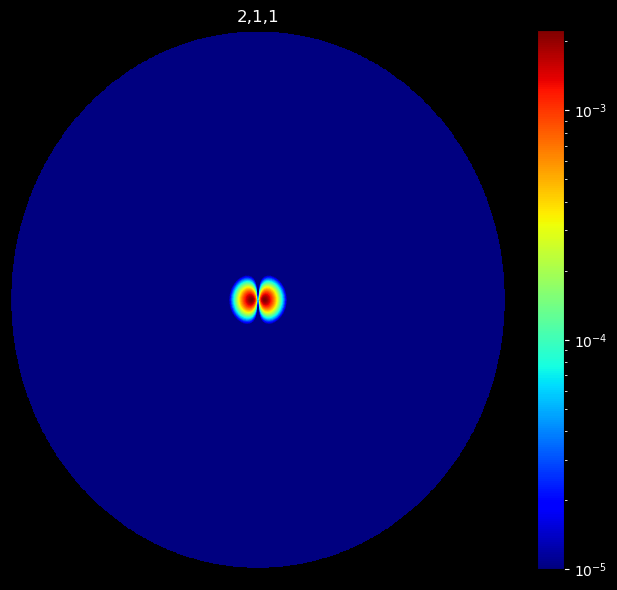

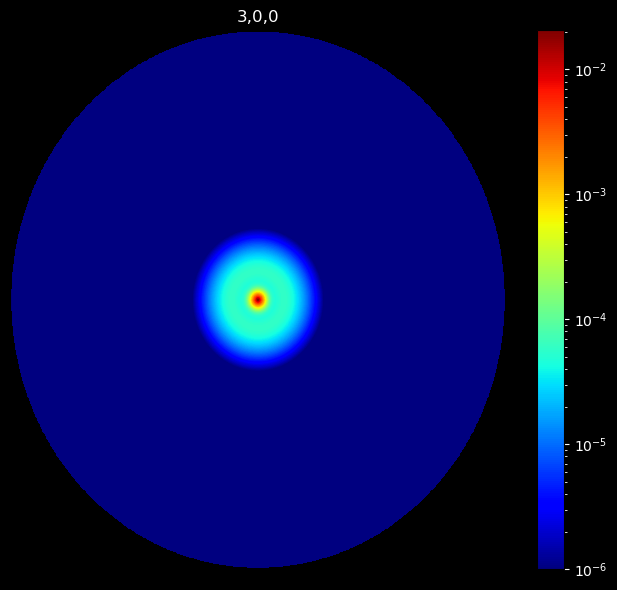

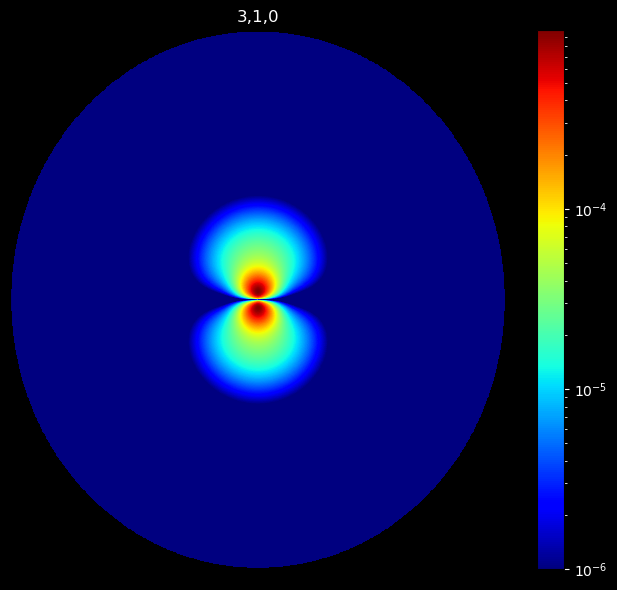

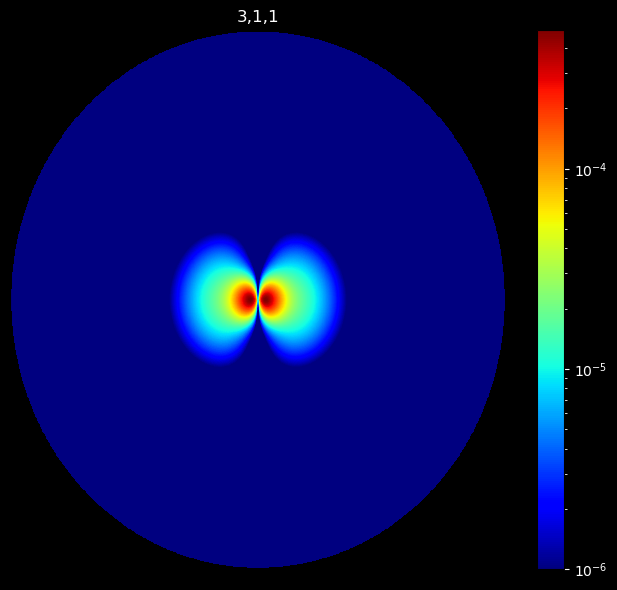

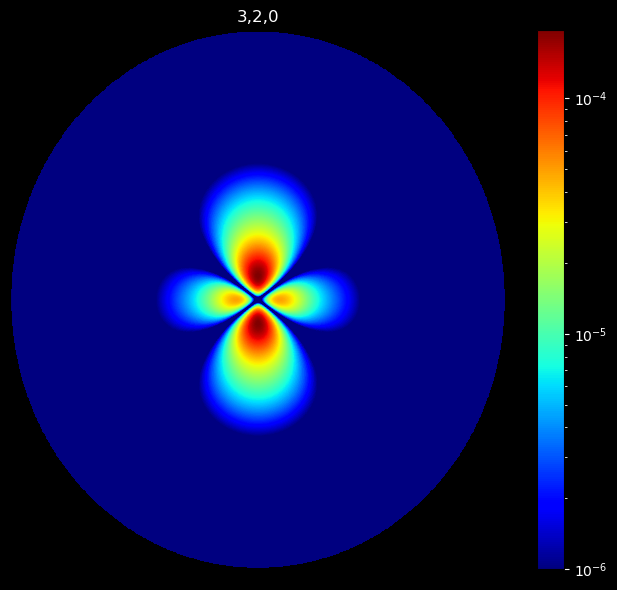

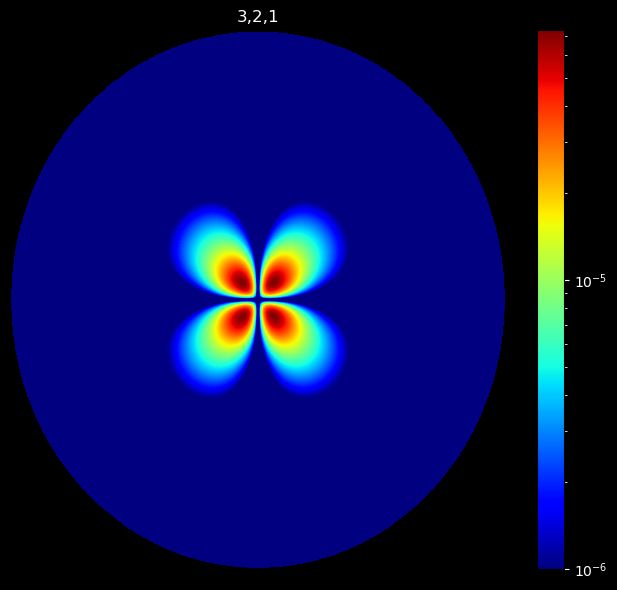

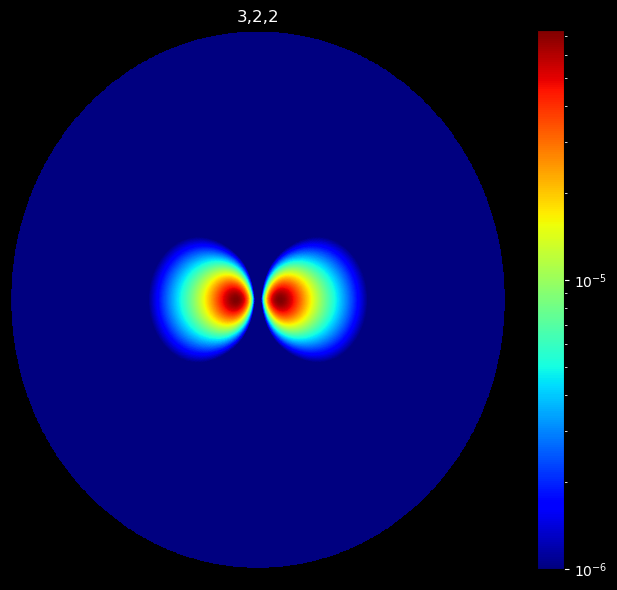

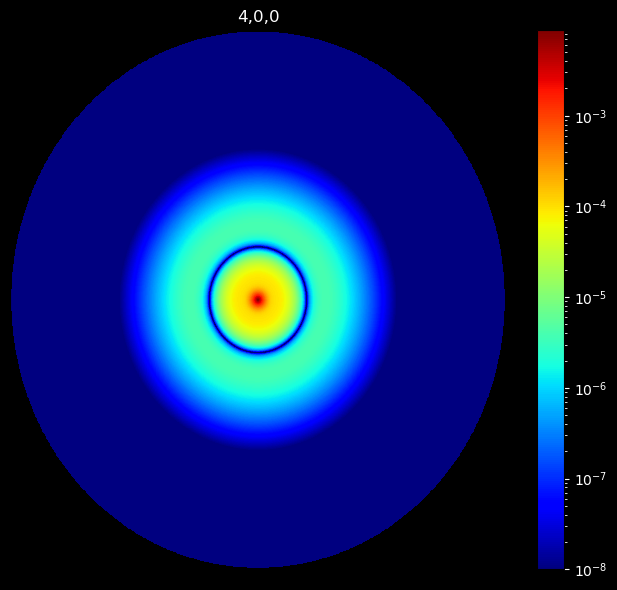

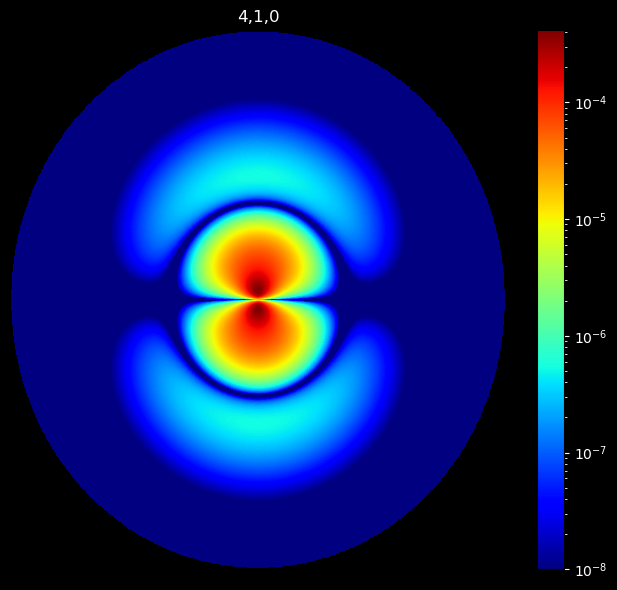

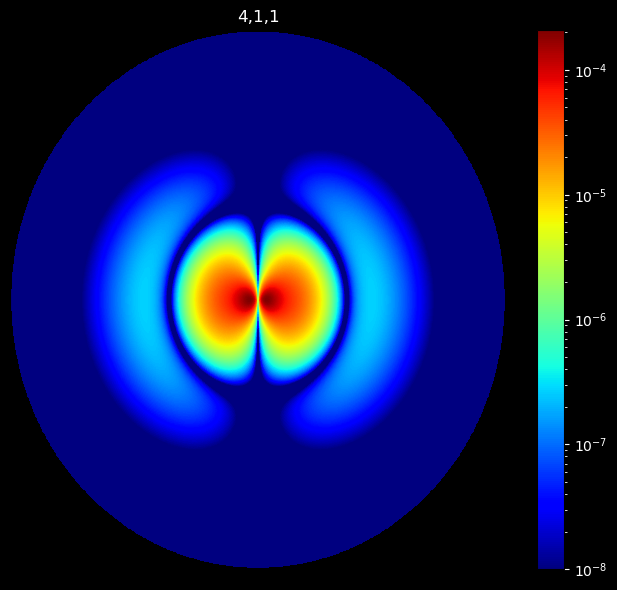

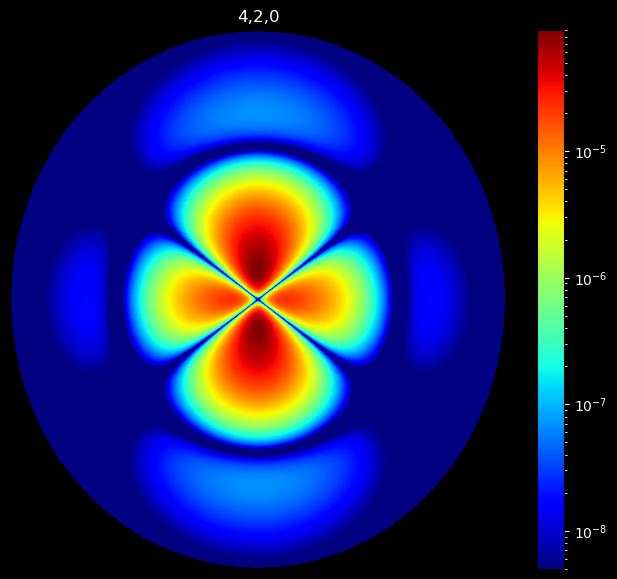

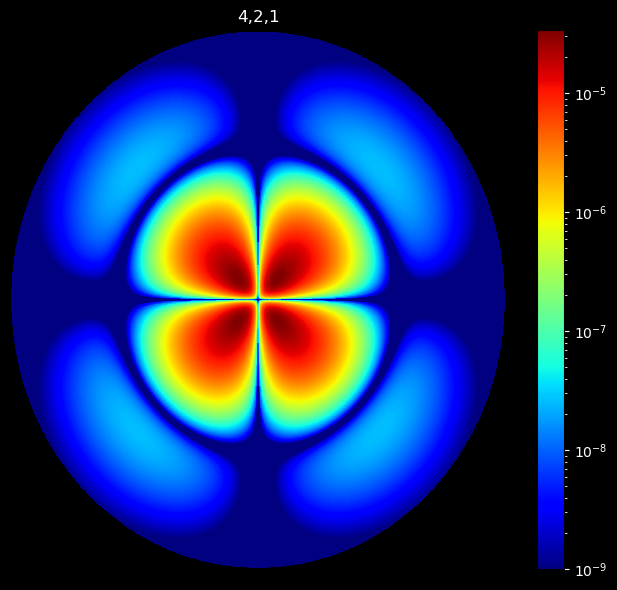

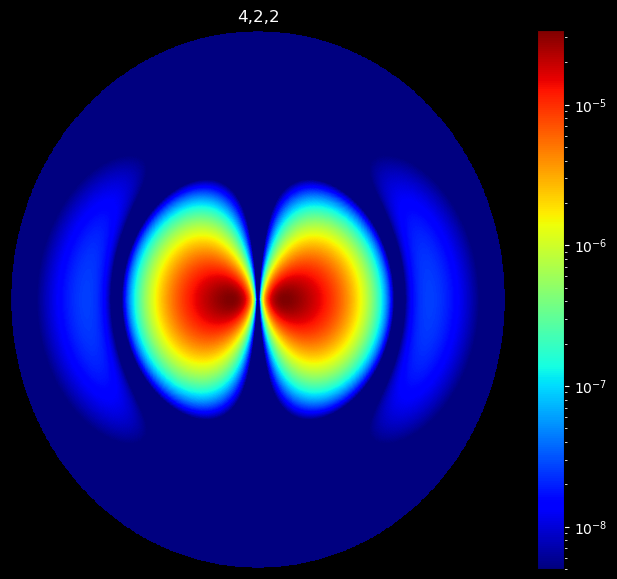

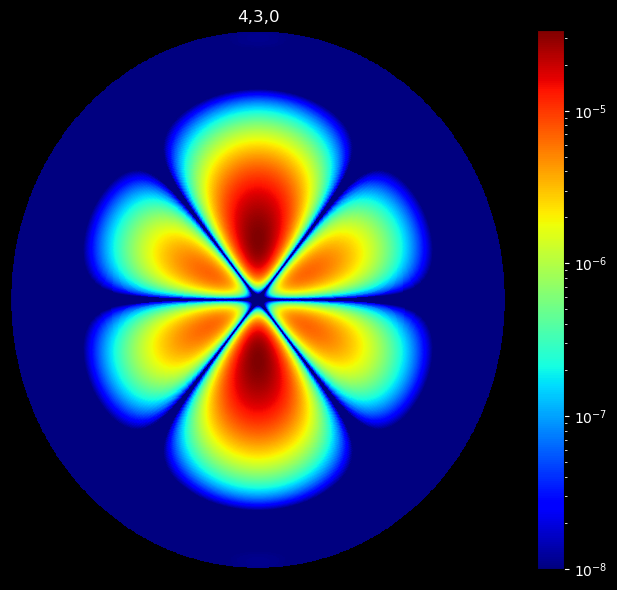

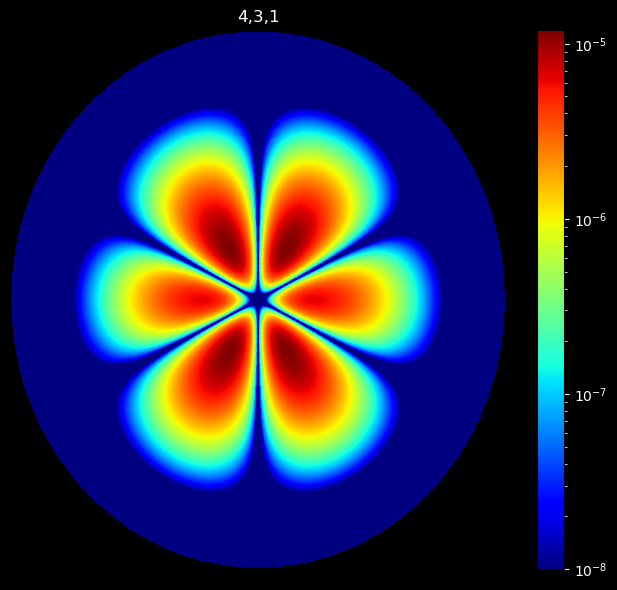

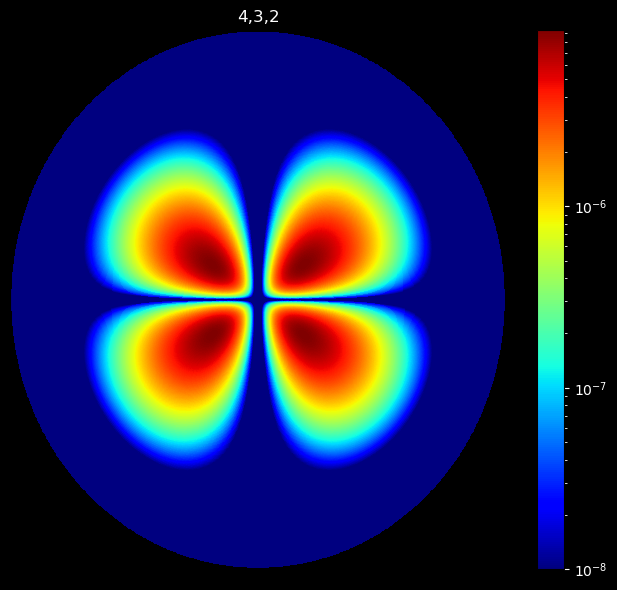

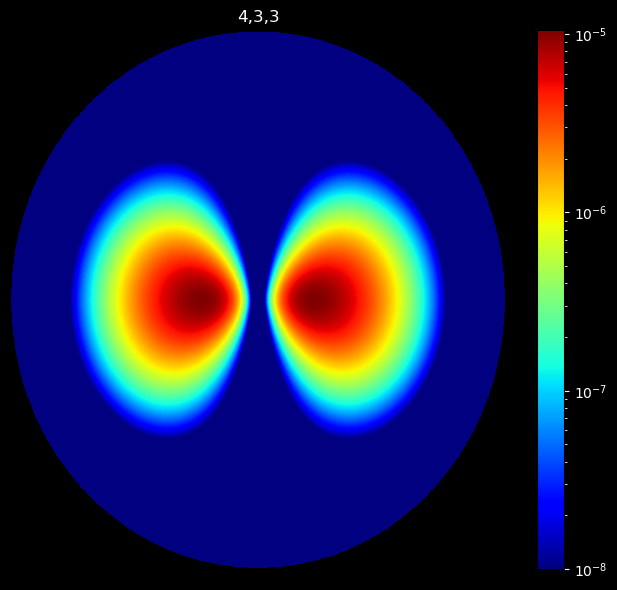

In [8]:
for k in range(1,5):
    for l in range(k):
        for m in range(l+1):
                Gen_Save_Graph(k, l, m, limInf[f'{k},{l},{m}'])
